## MALARIA CELL IMAGES 
+ Cell Images for Detecting Malaria

### about the dataset 

Content
The dataset contains 2 folders

+ Infected
+ Uninfected
+ And a total of 27,558 images.
+ Acknowledgements: 
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/
And uploaded here, so anybody trying to start working with this dataset can get started immediately, as to download the
dataset from NIH website is quite slow.

In [4]:
import cv2 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [5]:
img_path =  "C:/Users/zeyil/Desktop/data science/hw malaria cell/cell_images/cell_images/"
img_labels = ["Parasitized","Uninfected"]

In [6]:
img_list= []
label_list= []

for label in img_labels:  
    folder_path = img_path + "/" + label  # ex: cell_iamges/Parasitized
    for img_file in os.listdir(folder_path):  # dosya sadece os.listdir ile döngü yapılabilir
        img_list.append(folder_path + "/" + img_file)  #cell_iamges/Parasitized/image1.jpg
        label_list.append(label)

In [7]:
df= pd.DataFrame({"img":img_list, "label": label_list})


In [8]:
df.head()

,img,label
0,C:/Users/zeyil/Desktop/data science/hw malaria...,Parasitized
1,C:/Users/zeyil/Desktop/data science/hw malaria...,Parasitized
2,C:/Users/zeyil/Desktop/data science/hw malaria...,Parasitized
3,C:/Users/zeyil/Desktop/data science/hw malaria...,Parasitized
4,C:/Users/zeyil/Desktop/data science/hw malaria...,Parasitized


In [9]:
d= {"Parasitized": 1, "Uninfected":0}

In [10]:
df["encode_label"]= df["label"].map(d)

In [11]:
df.head()

,img,label,encode_label
0,C:/Users/zeyil/Desktop/data science/hw malaria...,Parasitized,1
1,C:/Users/zeyil/Desktop/data science/hw malaria...,Parasitized,1
2,C:/Users/zeyil/Desktop/data science/hw malaria...,Parasitized,1
3,C:/Users/zeyil/Desktop/data science/hw malaria...,Parasitized,1
4,C:/Users/zeyil/Desktop/data science/hw malaria...,Parasitized,1


In [12]:
x=[]
for img in df["img"]:
    im= cv2.imread(str(img))
    im = cv2.resize(im,(170,170))
    im= im/ 255.0
    x.append(im)

In [13]:
x= np.array(x)

In [14]:
y= df["encode_label"]

In [15]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.20, random_state=42)

In [16]:
model= Sequential()
model.add(Input(shape= (170,170,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation= "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(2, activation="softmax"))
# Modeli derliyoruz (compile ediyoruz). Bu aşama, modelin eğitim sürecine başlamadan önce yapılandırılması için gereklidir.
model.compile(
    optimizer="adam",  # "adam" optimizasyon algoritması kullanıyoruz. Adam, eğitim sürecinde öğrenme oranını dinamik olarak ayarlayarak hızlı ve etkili bir şekilde konverjans sağlar.
    loss="sparse_categorical_crossentropy",  # Kayıp fonksiyonu olarak "sparse_categorical_crossentropy" seçiyoruz. Bu, etiketlerin tamsayı biçiminde olduğu ve çok sınıflı sınıflandırma problemleri için uygun bir kayıp fonksiyonudur.
    metrics=["accuracy"]  # Modelin başarımını ölçmek için "accuracy" (doğruluk) metriğini kullanıyoruz. Bu metrik, modelin doğru tahmin oranını gösterir ve eğitim sürecinde performansı takip etmemize yardımcı olur.
)

In [17]:
history = model.fit(
    x_train,  
    y_train,  
    validation_data=(x_test, y_test), 
    epochs=20,  # Eğitim sürecinde modelin veriler üzerinde kaç kez geçeceğini belirtir. Bu örnekte, model veriler üzerinde 15 defa geçecek.
    verbose=1  # Eğitim sürecinin ilerlemesini detaylı olarak göstermek için kullanılır. "1" değeri, eğitim sırasında ilerleme çubuğu ve her epoch sonunda doğruluk ve kayıp değerlerini gösterir.
)

Epoch 1/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 114s 157ms/step - accuracy: 0.5675 - loss: 1.5362 - val_accuracy: 0.6272 - val_loss: 0.6484
Epoch 2/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 101s 147ms/step - accuracy: 0.6443 - loss: 0.6291 - val_accuracy: 0.6279 - val_loss: 0.6408
Epoch 3/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 104s 150ms/step - accuracy: 0.6963 - loss: 0.5848 - val_accuracy: 0.6413 - val_loss: 0.6517
Epoch 4/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 94s 137ms/step - accuracy: 0.7275 - loss: 0.5380 - val_accuracy: 0.6460 - val_loss: 0.6605
Epoch 5/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 94s 136ms/step - accuracy: 0.7475 - loss: 0.5039 - val_accuracy: 0.6411 - val_loss: 0.6768
Epoch 6/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 94s 136ms/step - accuracy: 0.7820 - loss: 0.4695 - val_accuracy: 0.6384 - val_loss: 0.7042
Epoch 7/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 93s 135ms/step - accuracy: 0.8141 - loss: 0.4082 - val_accuracy: 0.6852 - val_loss: 0.6287
Epoch 8/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 94s 136ms/step - accuracy: 0.9077 - loss


## Eğitim Sonuçları
- **Eğitim Doğruluğu:** %98.24
- **Test Doğruluğu:** 0.74
- **Eğitim Kaybı:** 0.05
- **Test Kaybı:** 1.21

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 168, 168, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 84, 84, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 82, 82, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 41, 41, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 107584)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      13,770,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,371,592 (157.82 MB)

 Trainable params: 13,790,530 (52.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,581,062 (105.21 MB)

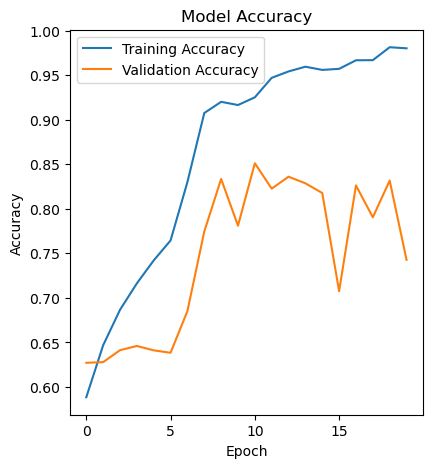

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

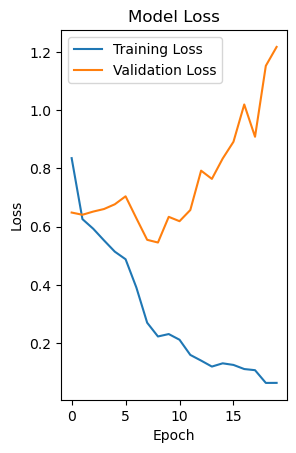

In [24]:
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()